<center>
    <img src="https://i.postimg.cc/26RtyM0s/3221asdf.jpg" width=690>
</center>

# <div style="color: white; border: lightgreen solid; font-weight: bold; font-size: 120%; text-align: center; padding: 12.0px; background: black">0. ENVIRONMENT INITIALIZATION & FUNCTION DEFINITION</div>

# Environment

In [10]:
# !pip install -q pandas "plotly>=5" "ipywidgets>=7.6" 
# !pip install -q wradlib

# !pip install opencv-contrib-python
# !pip install spatial-correlation-sampler --no-build-isolation
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 1.3 MB/s eta 0:05:01
   ---------------------------------------- 0.1/385.2 MB 991.0 kB/s eta 0:06:29
   ---------------------------------------- 0.1/385.2 MB 901.1 kB/s eta 0:07:08
   ---------------------------------------- 0.2/385.2 MB 1.0 MB/s eta 0:06:21
   ---------------------------------------- 0.2/385.2 MB 1.0 MB/s eta 0:06:15
   ---------------------------------------- 0.3/385.2 MB 1.0 MB/s eta 0:06:11
   ---------------------------------------- 0.3/385.2 MB 984.6 kB/s eta 0:06:31
   ---------------------------------------- 0.4/385.2 MB 1.0 MB/s eta 0:06:15
   ---------------------------------------- 0.4/385.2 MB 1.0 MB/s eta 0:06:1

DEPRECATION: Loading egg at c:\programdata\miniconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import sys
sys.path.append('../src')

In [3]:
import os
import json

from copy import deepcopy
from glob import glob
from pathlib import Path
from subprocess import Popen, PIPE, STDOUT

import pandas as pd
import numpy as np
import cv2

from PIL import Image

import plotly.express as px
import plotly.graph_objects as go

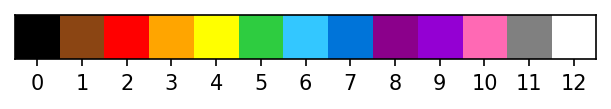

In [4]:
from arckit.vis import test_color

test_color()

# Functions

## IO Functions

In [5]:
def load_json(file_path: Path or str):
    if not isinstance(file_path, str):
        file_path = str(file_path)
    with open(file_path) as f:
        data = json.load(f)
    return data

## Visual Functions

# <div style="color: white; border: lightgreen solid; font-weight: bold; font-size: 120%; text-align: center; padding: 12.0px; background: black">1. DATA LOADING</div>

In [6]:
dataset_dir = Path('../data/competition')
# dataset_dir = Path('/kaggle/input/arc-prize-2024/')

train_challenges = load_json(dataset_dir / 'arc-agi_training_challenges.json')
train_solutions  = load_json(dataset_dir / 'arc-agi_training_solutions.json')

eval_challenges = load_json(dataset_dir / 'arc-agi_evaluation_challenges.json')
eval_solutions  = load_json(dataset_dir / 'arc-agi_evaluation_solutions.json')

test_challenges = load_json(dataset_dir / 'arc-agi_test_challenges.json')

In [8]:
import arckit

dataset = arckit.format_data(train_challenges, train_solutions, 
                              eval_challenges,  eval_solutions,)
train_set, eval_set = arckit.load_data(dataset)

# Test
# task = deepcopy(train_set['05f2a901'])
# for sample_in, sample_out in task.train:
#     print(sample_in)
#     print(sample_out)
#     print('\n\n')

# <div  style="color:white; border:lightgreen solid;  font-weight:bold; font-size:120%; text-align:center;padding:12.0px; background:black">2. DATA AUGMENTATION</div>

# Topic

## <div style="color: #D35142; font-weight: bold; font-size: 100%; text-align :center; padding: 12.0px; background: #ffffff"> Thank you for your reading! </div>
### <div style="color: #D35142; font-weight: bold; font-size: 100%; text-align: center; padding: 12.0px; background: #ffffff"> Please upvote this notebook if you consider it helpful. Your feedback is my motivation to contribute more ! </div>